In [1]:
# extract the data from the file 'chimie.xlsx' (colonne 2 & 3)
import pandas as pd

data = pd.read_excel('chimie.xlsx', header=None)
data = data.iloc[2:103, 1:3].values

# remove entries with missing data ('////' in column 2)
data = data[data[:, 1] != '////']

data

array([[0, 2.42],
       [0.5, 2.47],
       [1, 2.52],
       [1.5, 2.57],
       [2, 2.63],
       [2.5, 2.7],
       [3, 2.77],
       [3.5, 2.85],
       [4, 2.94],
       [4.5, 3.05],
       [5, 3.19],
       [5.5, 3.32],
       [6, 3.51],
       [6.5, 3.91],
       [7, 4.5],
       [7.5, 5.35],
       [8, 5.87],
       [8.5, 6.13],
       [9, 6.33],
       [9.5, 6.51],
       [10, 6.64],
       [10.5, 6.75],
       [11, 6.87],
       [11.5, 6.98],
       [12, 7.09],
       [12.5, 7.2],
       [13, 7.33],
       [13.5, 7.44],
       [14, 7.59],
       [14.5, 7.76],
       [15, 7.97],
       [15.5, 8.2],
       [16, 8.42],
       [16.5, 8.65],
       [17, 8.82],
       [17.5, 8.97],
       [18, 9.11],
       [18.5, 9.26],
       [19, 9.35],
       [19.5, 9.4],
       [20, 9.49],
       [20.5, 9.56],
       [21, 9.62],
       [21.5, 9.65],
       [22, 9.7],
       [22.5, 9.76],
       [23, 9.8],
       [23.5, 9.83],
       [24, 9.86],
       [24.5, 9.9],
       [25, 9.94],
       [2

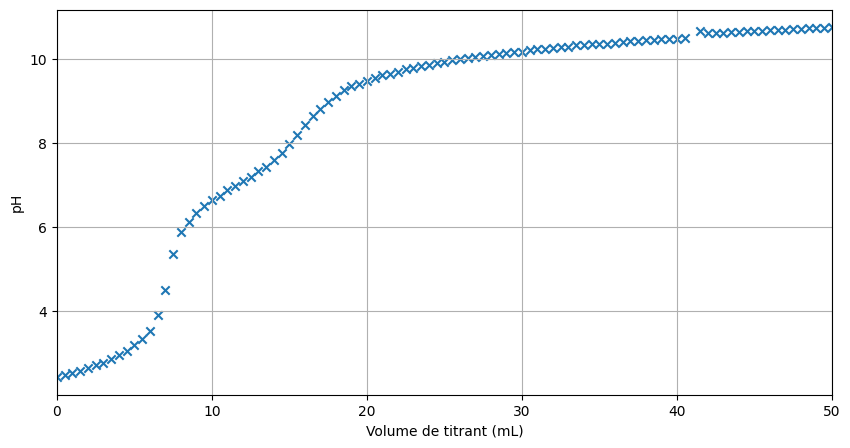

In [2]:
# display the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], marker='x')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.show()

In [3]:
# import the theorical data from the section 'result' in the file 'data-th.json'
import json

with open('data-th-param.json', 'r') as f:
    data_th = json.load(f)

# import the array with the tag "xy"
data_th = data_th['xy']

# convert in two arrays, one with the entry even and the other with the entry odd
import numpy as np

data_th = np.array(data_th)
data_th = np.array([data_th[::2], data_th[1::2]])

# multiply the volume of titrant by 1000
data_th[0] *= 1000

data_th

array([[ 0.        ,  0.1       ,  0.2       , ..., 49.8       ,
        49.9       , 50.        ],
       [ 2.40376298,  2.41165128,  2.41961215, ..., 11.94024737,
        11.94096347, 11.9416766 ]])

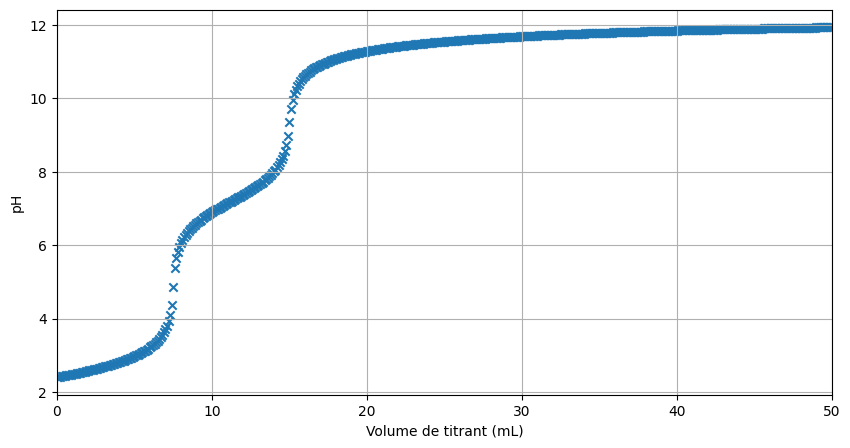

In [4]:
# display the theorical data
plt.figure(figsize=(10, 5))
plt.scatter(data_th[0], data_th[1], marker='x')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.show()

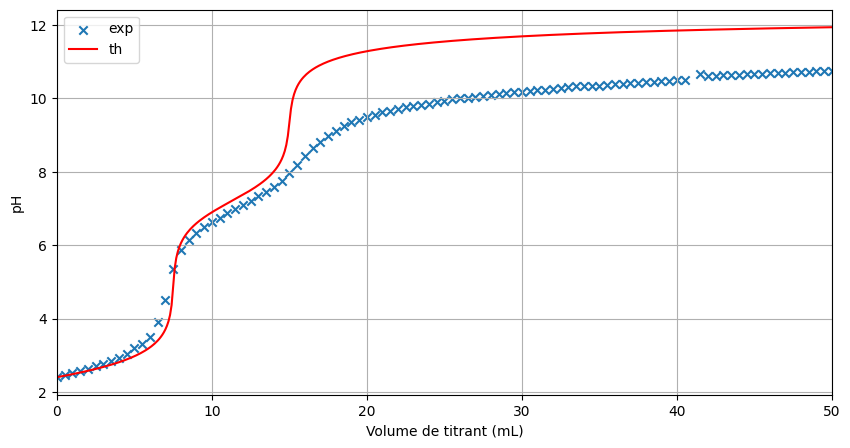

In [5]:
# display the theorical data and the experimental data in the same figure
# link the points with a line
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], marker='x', label='exp')
plt.plot(data_th[0], data_th[1], label='th', color='red')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend()
plt.show()

In [6]:
# extend the data with a step of 0.001 mL
data_fun = np.array([np.arange(0, 50, 0.001), np.interp(np.arange(0, 50, 0.001), data[:,0].astype(np.float64), data[:,1].astype(np.float64))])

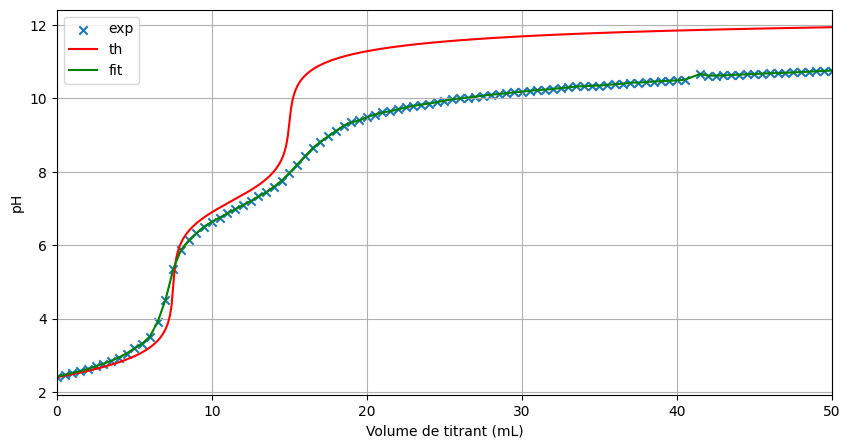

In [7]:
# display the theorical data, the experimental data and the fitted curve
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], marker='x', label='exp')
plt.plot(data_th[0], data_th[1], label='th', color='red')
plt.plot(data_fun[0], data_fun[1], label='fit', color='green')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend()
plt.show()

In [8]:
df = []
for i in range(1, len(data_fun[0]) - 1):
    df.append((data_fun[1][i + 1] - data_fun[1][i - 1]) / (data_fun[0][i + 1] - data_fun[0][i - 1]))

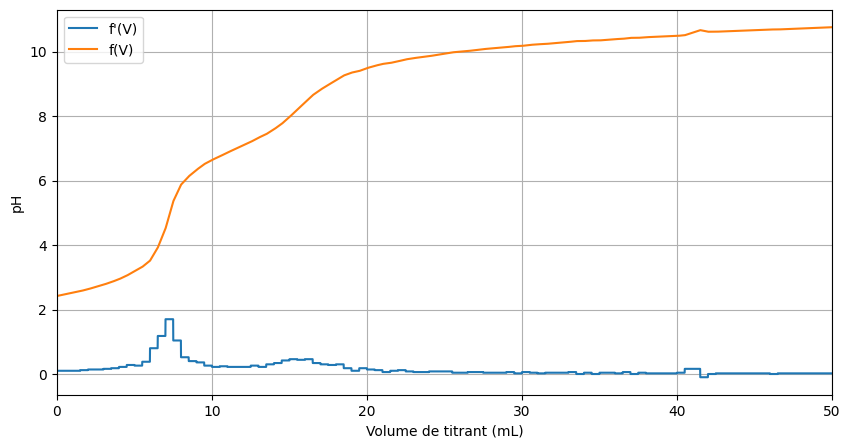

In [9]:
# plot the derivative and the fitted curve
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0][1:-1], df, label="f'(V)")
plt.plot(data_fun[0], data_fun[1], label='f(V)')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend()
plt.show()

In [10]:
# find the maximum of the derivative and the corresponding volume
max_df = np.max(df)
max_df_index = np.argmax(df)
max_df_volume = data_fun[0][max_df_index]

print(max_df)
print(max_df_volume)

1.7000000000003552
7.002


In [11]:
x_1 = 0
y_1 = 0
y_p_1 = 0
for i in range(len(df)):
    if data_fun[0][i] == 5:
        print(i)
        print(data_fun[0][i])
        print(data_fun[1][i])
        print(df[i])

        x_1 = data_fun[0][i]
        y_1 = data_fun[1][i]
        y_p_1 = df[i]

x_2 = 0
y_2 = 0
y_p_2 = 0
for i in range(7000, 13000):
    if np.abs(y_p_1 - df[i]) < np.abs(y_p_2 - df[i]):
        print(i)
        print(data_fun[0][i])
        print(data_fun[1][i])
        print(df[i])

        x_2 = data_fun[0][i]
        y_2 = data_fun[1][i]
        y_p_2 = df[i]

print('----------------------------')
print(x_1)
print(y_1)
print(y_p_1)
print(x_2)
print(y_2)
print(y_p_2)

5000
5.0
3.19
0.2599999999999556
7000
7.0
4.5
1.699999999999778
7999
7.9990000000000006
5.86896
0.7800000000002132
8002
8.002
5.871040000000001
0.519999999999698
8999
8.999
6.3296
0.38000000000003553
9499
9.499
6.50964
0.30999999999998223
9500
9.5
6.51
0.25999999999984014
9502
9.502
6.51052
0.26000000000007106
9505
9.505
6.5113
0.259999999999627
9506
9.506
6.51156
0.25999999999984014
9507
9.507
6.511819999999999
0.2600000000002842
9508
9.508000000000001
6.51208
0.26000000000007106
9509
9.509
6.51234
0.25999999999984014
9511
9.511000000000001
6.51286
0.26000000000007106
9513
9.513
6.51338
0.25999999999984014
9515
9.515
6.5139
0.26000000000007106
9519
9.519
6.51494
0.25999999999984014
9521
9.521
6.51546
0.26000000000007106
9522
9.522
6.51572
0.25999999999984014
9524
9.524000000000001
6.51624
0.26000000000007106
9526
9.526
6.51676
0.25999999999984014
9528
9.528
6.5172799999999995
0.26000000000007106
9532
9.532
6.51832
0.25999999999984014
9534
9.534
6.51884
0.26000000000007106
9535
9.535
6

In [12]:
delta_tan = 5
tan1 = [np.linspace(x_1 - delta_tan, x_1 + delta_tan, 100), y_p_1 * (np.linspace(x_1 - delta_tan, x_1 + delta_tan, 100) - x_1) + y_1]
tan2 = [np.linspace(x_2 - delta_tan, x_2 + delta_tan, 100), y_p_2 * (np.linspace(x_2 - delta_tan, x_2 + delta_tan, 100) - x_2) + y_2]

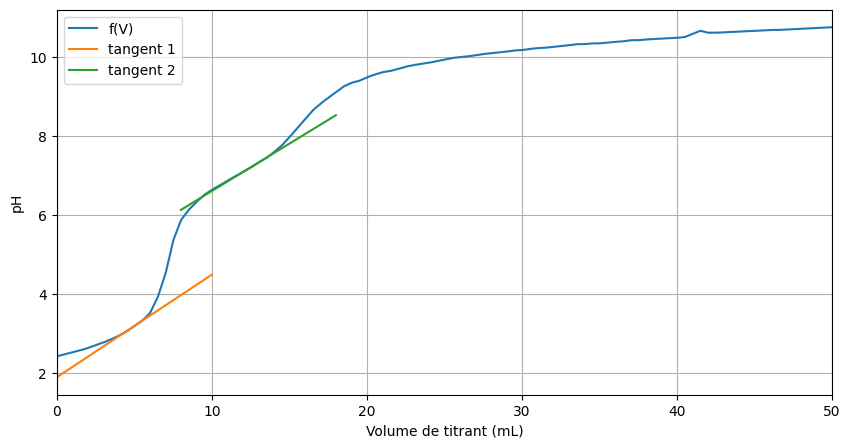

In [13]:
# plot the fitted curve and the tangents
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='f(V)')
plt.plot(tan1[0], tan1[1], label='tangent 1')
plt.plot(tan2[0], tan2[1], label='tangent 2')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend()
plt.show()

In [14]:
# make a line between the two tangents
middle = [np.linspace(x_1, x_2, 100), ((y_p_1 * (np.linspace(x_1, x_2, 100) - x_1) + y_1)+(y_p_2 * (np.linspace(x_1, x_2, 100) - x_2) + y_2))/2]

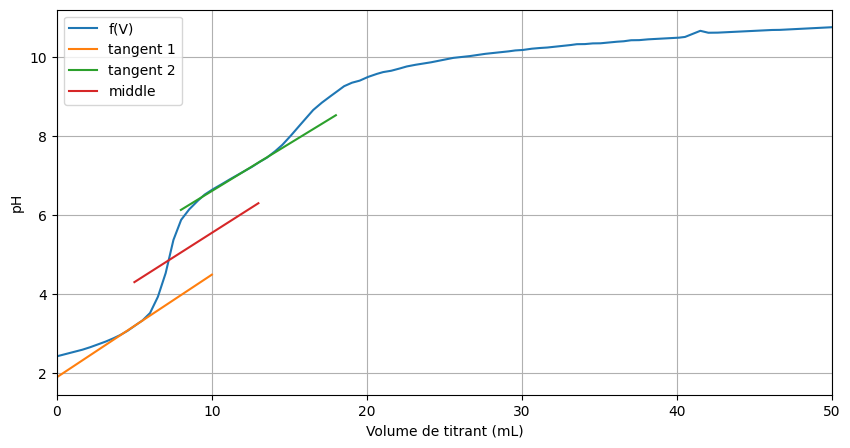

In [15]:
# plot the fitted curve, the tangents and the line between the tangents
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='f(V)')
plt.plot(tan1[0], tan1[1], label='tangent 1')
plt.plot(tan2[0], tan2[1], label='tangent 2')
plt.plot(middle[0], middle[1], label='middle')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend()
plt.show()

In [16]:
# find the intersection between the line and the fitted curve
intersection = [0, 0]
prec = 1
for i in range(len(data_fun[0])):
    for j in range(len(middle[0])):
        if np.abs(data_fun[0][i] - middle[0][j]) < 0.1:
            if np.abs(data_fun[1][i] - middle[1][j]) < prec:
                intersection = [data_fun[0][i], data_fun[1][i]]
                prec = np.abs(data_fun[1][i] - middle[1][j])

print(intersection)

[7.215, 4.8655]


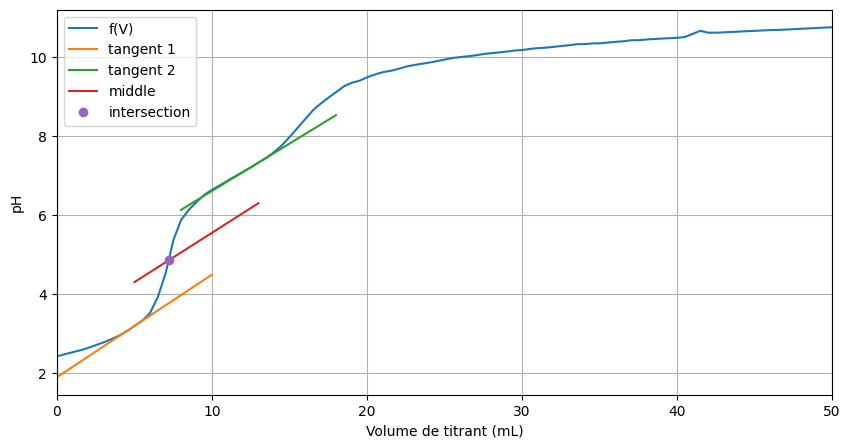

In [17]:
# plot the fitted curve, the tangents, the line between the tangents and the intersection
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='f(V)')
plt.plot(tan1[0], tan1[1], label='tangent 1')
plt.plot(tan2[0], tan2[1], label='tangent 2')
plt.plot(middle[0], middle[1], label='middle')
plt.plot(intersection[0], intersection[1], 'o', label='intersection')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend()
plt.show()

In [18]:
# find the data_fun at point intersection[0]/2 and the corresponding point
demi_equivalence = [0, 0]
for i in range(len(data_fun[0])):
    if np.abs(data_fun[0][i] - intersection[0]/2) < 0.001:
        demi_equivalence = [data_fun[0][i], data_fun[1][i]]

print(demi_equivalence)

[3.608, 2.86944]


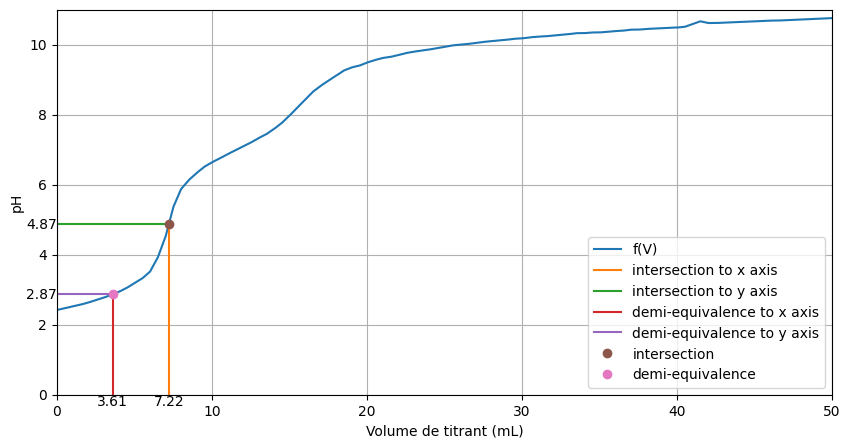

In [19]:
# plot the fitted curve the intersection and the point at intersection[0]/2
# for the two points, plot the line from the point to the x axis and to the y axis
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='f(V)')
plt.plot([intersection[0], intersection[0]], [intersection[1], 0], label='intersection to x axis')
plt.plot([intersection[0], 0], [intersection[1], intersection[1]], label='intersection to y axis')
plt.plot([demi_equivalence[0], demi_equivalence[0]], [demi_equivalence[1], 0], label='demi-equivalence to x axis')
plt.plot([demi_equivalence[0], 0], [demi_equivalence[1], demi_equivalence[1]], label='demi-equivalence to y axis')
plt.plot(intersection[0], intersection[1], 'o', label='intersection')
plt.plot(demi_equivalence[0], demi_equivalence[1], 'o', label='demi-equivalence')
# display the pH at the points near the axis
plt.text(intersection[0], 0, str(round(intersection[0], 2)), horizontalalignment='center', verticalalignment='top')
plt.text(0, intersection[1], str(round(intersection[1], 2)), horizontalalignment='right', verticalalignment='center')
plt.text(demi_equivalence[0], 0, str(round(demi_equivalence[0], 2)), horizontalalignment='center', verticalalignment='top')
plt.text(0, demi_equivalence[1], str(round(demi_equivalence[1], 2)), horizontalalignment='right', verticalalignment='center')

plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.ylim(0,11)
plt.legend()
plt.show()

In [20]:
xp_1 = 0
yp_1 = 0
yp_p_1 = 0
for i in range(len(df)):
    if data_fun[0][i] == 12:
        print(i)
        print(data_fun[0][i])
        print(data_fun[1][i])
        print(df[i])

        xp_1 = data_fun[0][i]
        yp_1 = data_fun[1][i]
        yp_p_1 = df[i]

xp_2 = 0
yp_2 = 0
yp_p_2 = 0
for i in range(19000, 25000):
    if np.abs(yp_p_1 - df[i]) < np.abs(yp_p_2 - df[i]):
        print(i)
        print(data_fun[0][i])
        print(data_fun[1][i])
        print(df[i])

        xp_2 = data_fun[0][i]
        yp_2 = data_fun[1][i]
        yp_p_2 = df[i]

print('----------------------------')
print(xp_1)
print(yp_1)
print(yp_p_1)
print(xp_2)
print(yp_2)
print(yp_p_2)

12000
12.0
7.09
0.22000000000003553
19499
19.499
9.3999
0.1399999999998579
19500
19.5
9.4
0.1800000000003908
----------------------------
12.0
7.09
0.22000000000003553
19.5
9.4
0.1800000000003908


In [21]:
tan1p = [np.linspace(xp_1 - delta_tan, xp_1 + delta_tan, 100), yp_p_1 * (np.linspace(xp_1 - delta_tan, xp_1 + delta_tan, 100) - xp_1) + yp_1]
tan2p = [np.linspace(xp_2 - delta_tan, xp_2 + delta_tan, 100), yp_p_2 * (np.linspace(xp_2 - delta_tan, xp_2 + delta_tan, 100) - xp_2) + yp_2]

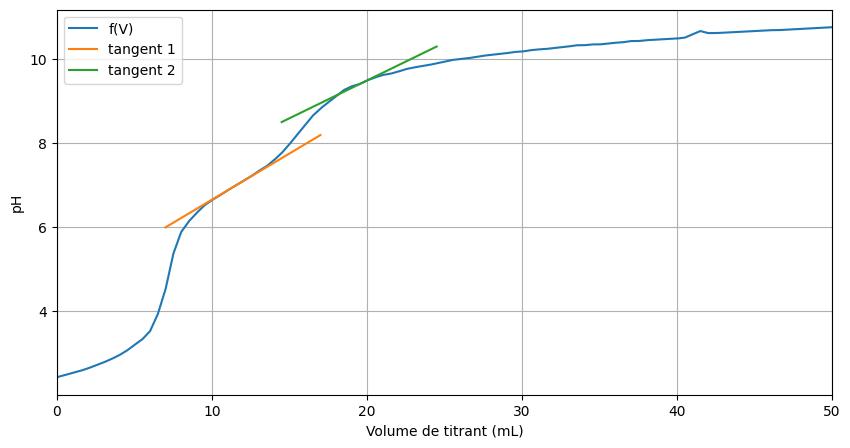

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='f(V)')
plt.plot(tan1p[0], tan1p[1], label='tangent 1')
plt.plot(tan2p[0], tan2p[1], label='tangent 2')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend()
plt.show()

In [23]:
middlep = [np.linspace(xp_1, xp_2, 100), ((yp_p_1 * (np.linspace(xp_1, xp_2, 100) - xp_1) + yp_1)+(yp_p_2 * (np.linspace(xp_1, xp_2, 100) - xp_2) + yp_2))/2]

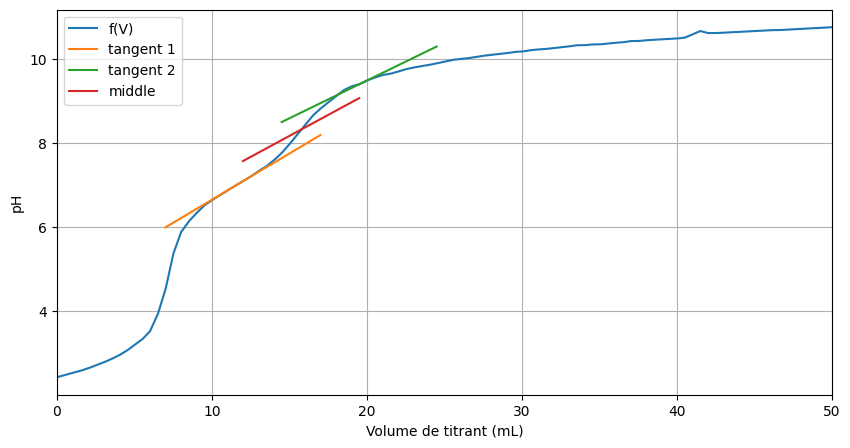

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='f(V)')
plt.plot(tan1p[0], tan1p[1], label='tangent 1')
plt.plot(tan2p[0], tan2p[1], label='tangent 2')
plt.plot(middlep[0], middlep[1], label='middle')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend()
plt.show()

In [25]:
intersectionp = [0, 0]
prec = 1
for j in range(len(middlep[0])):
    for i in range(len(data_fun[0])):
        if np.abs(data_fun[0][i] - middlep[0][j]) < 0.1:
            if np.abs(data_fun[1][i] - middlep[1][j]) < prec:
                intersectionp = [data_fun[0][i], data_fun[1][i]]
                prec = np.abs(data_fun[1][i] - middlep[1][j])

print(intersectionp)

[15.790000000000001, 8.3276]


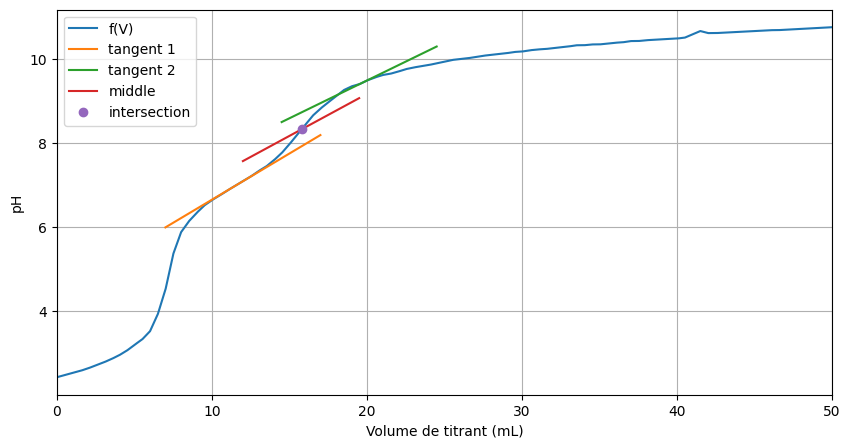

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='f(V)')
plt.plot(tan1p[0], tan1p[1], label='tangent 1')
plt.plot(tan2p[0], tan2p[1], label='tangent 2')
plt.plot(middlep[0], middlep[1], label='middle')
plt.plot(intersectionp[0], intersectionp[1], 'o', label='intersection')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend()
plt.show()

In [27]:
# find the data_fun at point intersection[0]/2 and the corresponding point
demi_equivalencep = [0, 0]
for i in range(len(data_fun[0])):
    if np.abs(data_fun[0][i] - intersectionp[0]/2) < 0.001:
        demi_equivalencep = [data_fun[0][i], data_fun[1][i]]

print(demi_equivalencep)

[7.896, 5.76184]


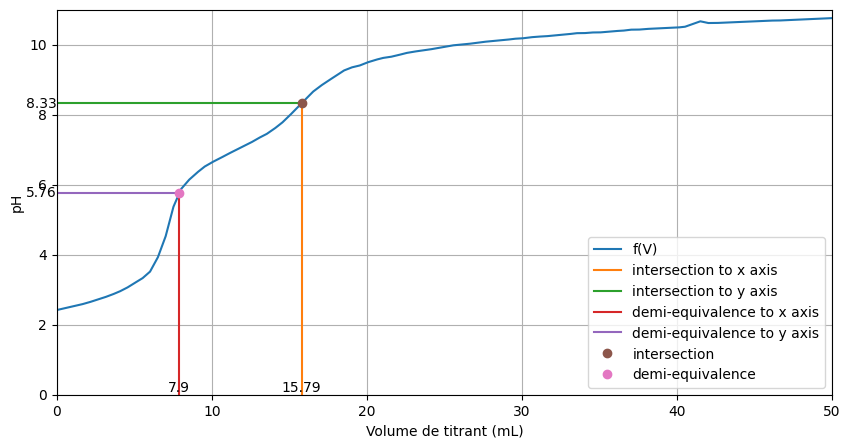

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='f(V)')
plt.plot([intersectionp[0], intersectionp[0]], [intersectionp[1], 0], label='intersection to x axis')
plt.plot([intersectionp[0], 0], [intersectionp[1], intersectionp[1]], label='intersection to y axis')
plt.plot([demi_equivalencep[0], demi_equivalencep[0]], [demi_equivalencep[1], 0], label='demi-equivalence to x axis')
plt.plot([demi_equivalencep[0], 0], [demi_equivalencep[1], demi_equivalencep[1]], label='demi-equivalence to y axis')
plt.plot(intersectionp[0], intersectionp[1], 'o', label='intersection')
plt.plot(demi_equivalencep[0], demi_equivalencep[1], 'o', label='demi-equivalence')
# display the pH at the points near the axis
plt.text(intersectionp[0], 0, str(round(intersectionp[0], 2)), horizontalalignment='center', verticalalignment='bottom')
plt.text(0, intersectionp[1], str(round(intersectionp[1], 2)), horizontalalignment='right', verticalalignment='center')
plt.text(demi_equivalencep[0], 0, str(round(demi_equivalencep[0], 2)), horizontalalignment='center', verticalalignment='bottom')
plt.text(0, demi_equivalencep[1], str(round(demi_equivalencep[1], 2)), horizontalalignment='right', verticalalignment='center')

plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 11)
plt.legend()
plt.show()

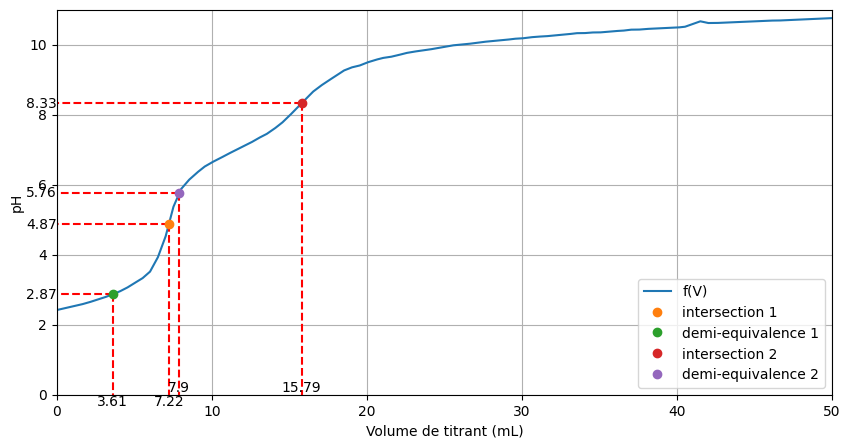

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='f(V)')

plt.plot([intersection[0], intersection[0]], [intersection[1], 0], 'r--')
plt.plot([intersection[0], 0], [intersection[1], intersection[1]], 'r--')
plt.plot([demi_equivalence[0], demi_equivalence[0]], [demi_equivalence[1], 0], 'r--')
plt.plot([demi_equivalence[0], 0], [demi_equivalence[1], demi_equivalence[1]], 'r--')
plt.plot(intersection[0], intersection[1], 'o', label='intersection 1')
plt.plot(demi_equivalence[0], demi_equivalence[1], 'o', label='demi-equivalence 1')
# display the pH at the points near the axis
plt.text(intersection[0], 0, str(round(intersection[0], 2)), horizontalalignment='center', verticalalignment='top')
plt.text(0, intersection[1], str(round(intersection[1], 2)), horizontalalignment='right', verticalalignment='center')
plt.text(demi_equivalence[0], 0, str(round(demi_equivalence[0], 2)), horizontalalignment='center', verticalalignment='top')
plt.text(0, demi_equivalence[1], str(round(demi_equivalence[1], 2)), horizontalalignment='right', verticalalignment='center')

plt.plot([intersectionp[0], intersectionp[0]], [intersectionp[1], 0], 'r--')
plt.plot([intersectionp[0], 0], [intersectionp[1], intersectionp[1]], 'r--')
plt.plot([demi_equivalencep[0], demi_equivalencep[0]], [demi_equivalencep[1], 0], 'r--')
plt.plot([demi_equivalencep[0], 0], [demi_equivalencep[1], demi_equivalencep[1]], 'r--')
plt.plot(intersectionp[0], intersectionp[1], 'o', label='intersection 2')
plt.plot(demi_equivalencep[0], demi_equivalencep[1], 'o', label='demi-equivalence 2')
# display the pH at the points near the axis
plt.text(intersectionp[0], 0, str(round(intersectionp[0], 2)), horizontalalignment='center', verticalalignment='bottom')
plt.text(0, intersectionp[1], str(round(intersectionp[1], 2)), horizontalalignment='right', verticalalignment='center')
plt.text(demi_equivalencep[0], 0, str(round(demi_equivalencep[0], 2)), horizontalalignment='center', verticalalignment='bottom')
plt.text(0, demi_equivalencep[1], str(round(demi_equivalencep[1], 2)), horizontalalignment='right', verticalalignment='center')

plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.ylim(0, 11)
plt.legend()
plt.savefig('titration.png')
plt.show()

In [30]:
# sum up all the interesting points
points = [intersection, demi_equivalence, intersectionp, demi_equivalencep]

for point in points:
    print('pH =', point[1], 'at', point[0], 'mL')

pH = 4.8655 at 7.215 mL
pH = 2.86944 at 3.608 mL
pH = 8.3276 at 15.790000000000001 mL
pH = 5.76184 at 7.896 mL


# Pour inclure en LaTeX

In [42]:
# write each column of 'data' in a file, separated by a '&'
with open('titration.txt', 'w') as f:
    for i in range(len(data[0])):
        for j in range(len(data)):
            f.write(str(data[j][i]))
            if j != len(data) - 1 and j % 12 != 11:
                f.write(' & ')
            if j % 12 == 11:
                f.write(' \\\\\n ')
        f.write('\n ----------------- \n')

    f.write('|>{\\columncolor{gray}}c|')
    for i in range(12):
        if i % 2 != 0:
            f.write('>{\\columncolor{lightgray}}')
        f.write('c|')

In [32]:
import tikzplotlib

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='10cm', height='10cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

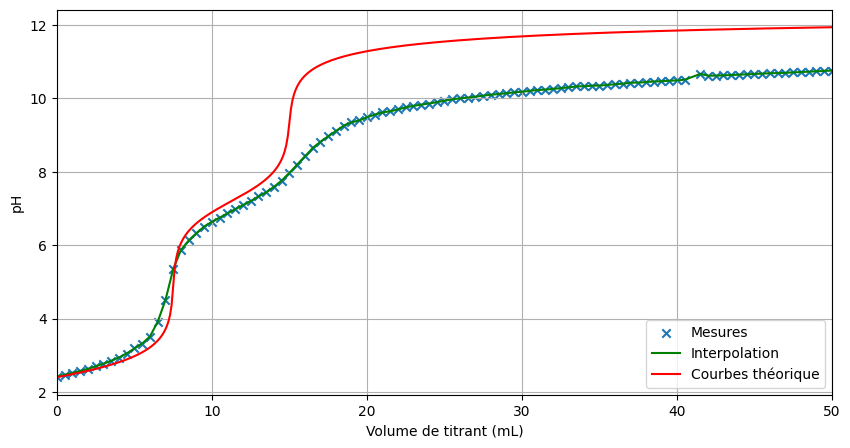

In [33]:
plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], marker='x', label='Mesures')
plt.plot(data_fun[0], data_fun[1], label='Interpolation', color='green')
plt.plot(data_th[0], data_th[1], label=r'Courbes théorique', color='red')
plt.xlabel('Volume de titrant (mL)')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 50)
plt.legend(loc='lower right')

save_fig('data-plot', width='15cm')

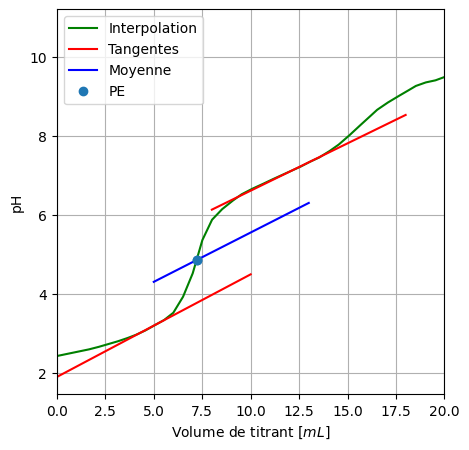

In [34]:
plt.figure(figsize=(5, 5))
plt.plot(data_fun[0], data_fun[1], label='Interpolation', color='green')
plt.plot(tan1[0], tan1[1], label='Tangentes', color='red')
plt.plot(tan2[0], tan2[1], color='red')
plt.plot(middle[0], middle[1], label='Moyenne', color='blue')
plt.plot([intersection[0], intersection[0]], [intersection[1], intersection[1]], 'o', label='PE')
plt.xlabel(r'Volume de titrant $[mL]$')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 20)
plt.legend()

save_fig('tangent1-plot')

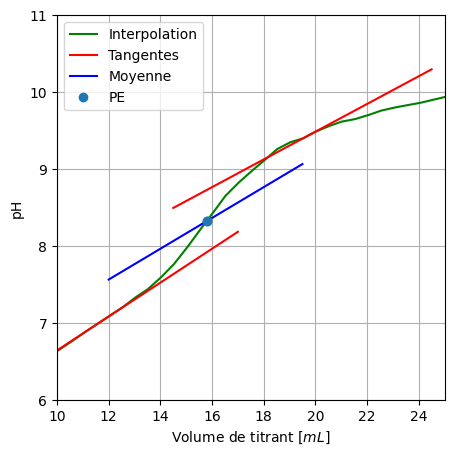

In [35]:
plt.figure(figsize=(5, 5))
plt.plot(data_fun[0], data_fun[1], label='Interpolation', color='green')
plt.plot(tan1p[0], tan1p[1], label='Tangentes', color='red')
plt.plot(tan2p[0], tan2p[1], color='red')
plt.plot(middlep[0], middlep[1], label='Moyenne', color='blue')
plt.plot([intersectionp[0],intersectionp[0]], [intersectionp[1],intersectionp[1]], 'o', label='PE')
plt.xlabel(r'Volume de titrant $[mL]$')
plt.ylabel('pH')
plt.grid()
plt.xlim(10, 25)
plt.ylim(6, 11)
plt.legend()

save_fig('tangent2-plot')

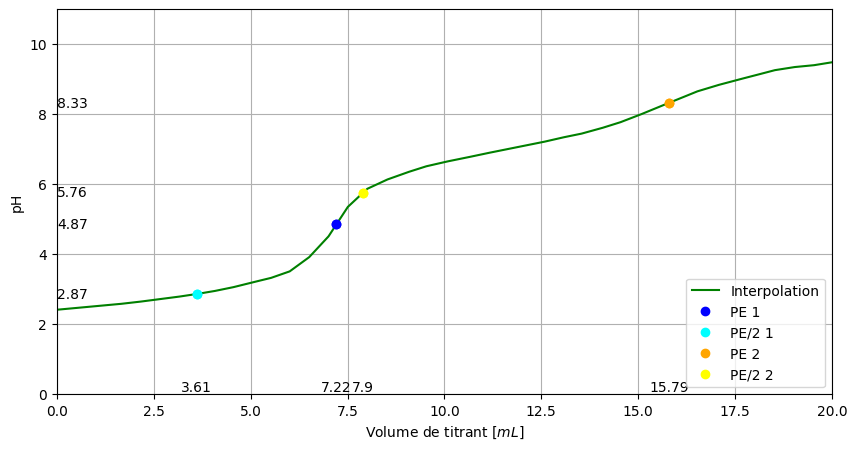

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(data_fun[0], data_fun[1], label='Interpolation', color='green')

#plt.plot([intersection[0], intersection[0]], [intersection[1], 0], 'r--')
#plt.plot([intersection[0], 0], [intersection[1], intersection[1]], 'r--')
#plt.plot([demi_equivalence[0], demi_equivalence[0]], [demi_equivalence[1], 0], 'r--')
#plt.plot([demi_equivalence[0], 0], [demi_equivalence[1], demi_equivalence[1]], 'r--')
plt.plot([intersection[0],intersection[0]], [intersection[1],intersection[1]], 'o', label='PE 1', color='blue')
plt.plot([demi_equivalence[0],demi_equivalence[0]], [demi_equivalence[1],demi_equivalence[1]], 'o', label='PE/2 1', color='cyan')
# display the pH at the points near the axis
plt.text(intersection[0], 0, str(round(intersection[0], 2)), horizontalalignment='center', verticalalignment='bottom')
plt.text(0, intersection[1], str(round(intersection[1], 2)), horizontalalignment='left', verticalalignment='center')
plt.text(demi_equivalence[0], 0, str(round(demi_equivalence[0], 2)), horizontalalignment='center', verticalalignment='bottom')
plt.text(0, demi_equivalence[1], str(round(demi_equivalence[1], 2)), horizontalalignment='left', verticalalignment='center')

#plt.plot([intersectionp[0], intersectionp[0]], [intersectionp[1], 0], 'r--')
#plt.plot([intersectionp[0], 0], [intersectionp[1], intersectionp[1]], 'r--')
#plt.plot([demi_equivalencep[0], demi_equivalencep[0]], [demi_equivalencep[1], 0], 'r--')
#plt.plot([demi_equivalencep[0], 0], [demi_equivalencep[1], demi_equivalencep[1]], 'r--')
plt.plot([intersectionp[0],intersectionp[0]], [intersectionp[1],intersectionp[1]], 'o', label='PE 2', color='orange')
plt.plot([demi_equivalencep[0],demi_equivalencep[0]], [demi_equivalencep[1],demi_equivalencep[1]], 'o', label='PE/2 2', color='yellow')
# display the pH at the points near the axis
plt.text(intersectionp[0], 0, str(round(intersectionp[0], 2)), horizontalalignment='center', verticalalignment='bottom')
plt.text(0, intersectionp[1], str(round(intersectionp[1], 2)), horizontalalignment='left', verticalalignment='center')
plt.text(demi_equivalencep[0], 0, str(round(demi_equivalencep[0], 2)), horizontalalignment='center', verticalalignment='bottom')
plt.text(0, demi_equivalencep[1], str(round(demi_equivalencep[1], 2)), horizontalalignment='left', verticalalignment='center')

plt.xlabel(r'Volume de titrant $[mL]$')
plt.ylabel('pH')
plt.grid()
plt.xlim(0, 20)
plt.ylim(0, 11)
plt.legend(loc='lower right')

save_fig('resum-tit', width='15cm')

In [37]:
# calcul de la concentration de H3PO4
# avec le pKa mesuré

c_hpo_m = np.power(10, (- 2 * (data[:, 1][0] - 1/2 * demi_equivalence[1])))

# avec le pKa théorique

c_hpo_t = np.power(10, (- 2 * (data[:, 1][0] - 1/2 * 2.16)))

print('pH at t=0 : ',data[:, 1][0])
print('pKa :')
print('- exp : ',demi_equivalence[1])
print('- th : ',2.16)
print('C :')
print('- exp : ',c_hpo_m)
print('- th : ',c_hpo_t)

pH at t=0 :  2.42
pKa :
- exp :  2.86944
- th :  2.16
C :
- exp :  0.01070138527596872
- th :  0.0020892961308540407


In [38]:
# concentration coca selon leur site - 98 g = 1 mole of h3po4
(190/98)/330

0.005875077303648732

In [39]:
190/330

0.5757575757575758

In [40]:
np.abs(demi_equivalence[1]-2.16)/2.16*100

32.844444444444434

In [41]:
np.abs(demi_equivalencep[1]-7.21)/7.21*100

20.085436893203877